In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r"Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

In [3]:
print(f"Number of companies in the df = {len(df['Company Name'].unique())}")


Number of companies in the df = 439


In [4]:
num_jobs = df.loc[df["City"].str.upper() == "QUEENS", 'Job created'].sum(axis = 0)
print(f"number of jobs created in Queens is {int(num_jobs)}")

number of jobs created in Queens is 90


In [5]:
all_emails = df.loc[df['company email'].str.contains("@", na = False), "company email"]
temp_domains = [x[1] for x in all_emails.str.split("@")]
print(f" Total domains = {len(temp_domains)}")
print(f" Unique domains = {len(set(temp_domains))}")

 Total domains = 428
 Unique domains = 356


In [6]:
group = df.groupby("NTA")
NTA_5 = group.count()["Company Name"] > 5
result = group.mean()[NTA_5][["Job created", "Total Savings"]]
# result.to_csv("result")

Text(0.5, 1.0, 'Jobs Created vs Total Savings')

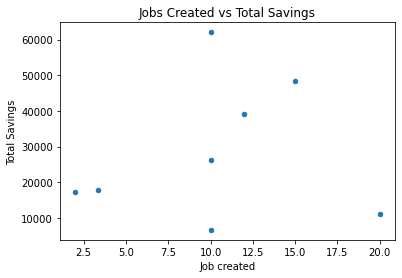

In [7]:
group.mean().plot.scatter("Job created","Total Savings" )
plt.title("Jobs Created vs Total Savings")


Text(0.5, 1.0, 'Jobs Created vs Total Savings, with Log scales')

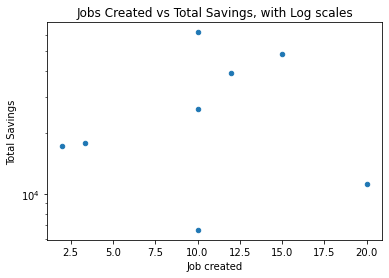

In [9]:
group.mean().plot.scatter("Job created","Total Savings" )
plt.yscale("Log")
plt.title("Jobs Created vs Total Savings, with Log scales")

Text(0.5, 0, 'Total Savings')

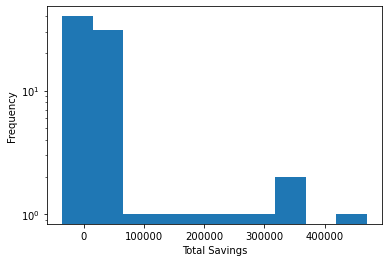

In [10]:
group.mean()["Total Savings"].plot.hist(log = True)
plt.xlabel("Total Savings")

In [11]:
import datetime as dt

In [17]:
pd.to_datetime(df["Effective Date"]).dt.month

0       3
1       4
2       1
3       2
4       6
       ..
445    12
446    12
447     8
448     1
449    10
Name: Effective Date, Length: 450, dtype: int64

Text(0, 0.5, 'Jobs Created')

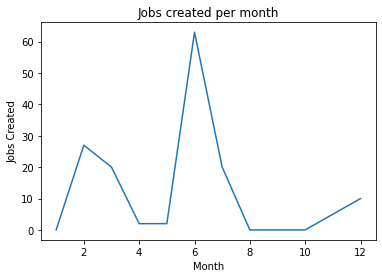

In [19]:

month = df.groupby(pd.to_datetime(df["Effective Date"]).dt.month).sum()
plt.plot(month["Job created"])
plt.title("Jobs created per month")
plt.xlabel("Month")
plt.ylabel("Jobs Created")